# MachineMax Technical Test

## Imports

In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
import re
from tqdm import tqdm
from dataclasses import dataclass
from pykalman import KalmanFilter
from Codebase.utils import TimeSeriesDataGenerator, generate_rms_ranges

## Data Generation

In [2]:
# Defining parameters for the time series data
start_date = '2021-01-01 00:00:00'
end_date = '2021-01-01 00:30:00'
start_date = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
end_date = datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')
freq = '1S'
max_duration = 250

In [3]:
generator = TimeSeriesDataGenerator()
df = generator.generate_time_series_data(start_date, end_date, freq, max_duration)

Generating Data: 100%|██████████████████| 1801/1801 [00:00<00:00, 900136.02it/s]

### Plotting Data

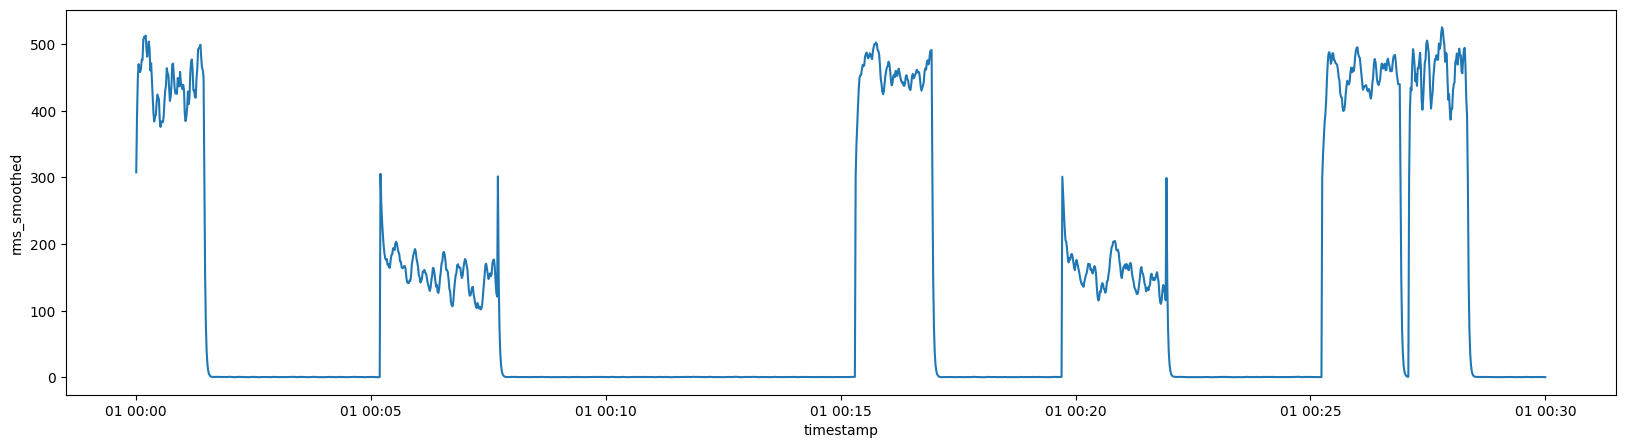

In [13]:
ax, fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='timestamp', y='rms_smoothed', data=df, ax=fig)
# sns.lineplot(x='timestamp', y='rms', data=df, ax=fig, color='red', linestyle='--')
plt.show()

### Saving Data

In [19]:
for i in range(0, 11):
    df = generator.generate_time_series_data(start_date, end_date, freq, max_duration)
    df.drop(columns=['state_change', 'rms'], inplace=True)
    df.to_csv(f'./Generated Data/dataset_{i}.csv', index=False)

Generating Data: 100%|██████████████████| 1801/1801 [00:00<00:00, 900565.27it/s]


In [26]:
df_test = pd.read_csv('./Generated Data/dataset_2.csv')
df_test.head()

,timestamp,state,rms,state_change,rms_smoothed
0,2021-01-01 00:00:00,OFF,0.122671,True,0.123773
1,2021-01-01 00:00:01,OFF,0.039747,False,0.141134
2,2021-01-01 00:00:02,OFF,0.064354,False,0.200447
3,2021-01-01 00:00:03,OFF,0.322923,False,0.316072
4,2021-01-01 00:00:04,OFF,0.525339,False,0.428861


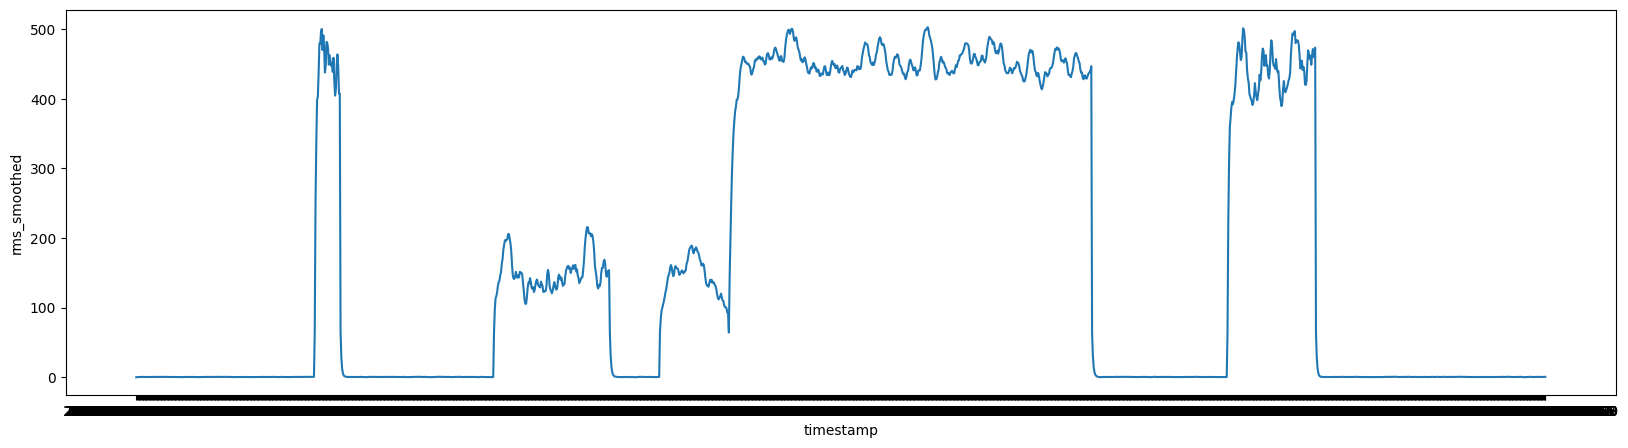

In [27]:
ax, fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='timestamp', y='rms_smoothed', data=df_test, ax=fig)
plt.show()

In [32]:
rms_ranges = generate_rms_ranges(
    max_value_1 = 1000,
    max_value_2 = 4000
)

for i in range(11, 21):
    rms_ranges = generate_rms_ranges(
        max_value_1 = 1000,
        max_value_2 = 4000
    )
    df = generator.generate_time_series_data(start_date, end_date, freq, max_duration, rms_ranges)
    # df.drop(columns=['state_change', 'rms'], inplace=True)
    df.to_csv(f'./Generated Data/dataset_{i}.csv', index=False)

Generating Data: 100%|█████████████████| 1801/1801 [00:00<00:00, 1798557.50it/s]


## Next Steps
---
1. Produce several datasets using the data generator:
- You should vary the rms_value ranges for each dataset to simulate sensors being placed on different vehicles

2. Train an initial model on one of the datasets:
- Verify model performance on test set
- Verify model performance on additional datasets, to test robustness of the model
- If it can't generalise to new contexts, retrain the model with additional data

3. If time available, go back to data generation and try different filtering methods